**LSTM (Long Short Term Memory)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/sample_data/international-airline-passengers.csv",parse_dates=["Month"],index_col="Month")

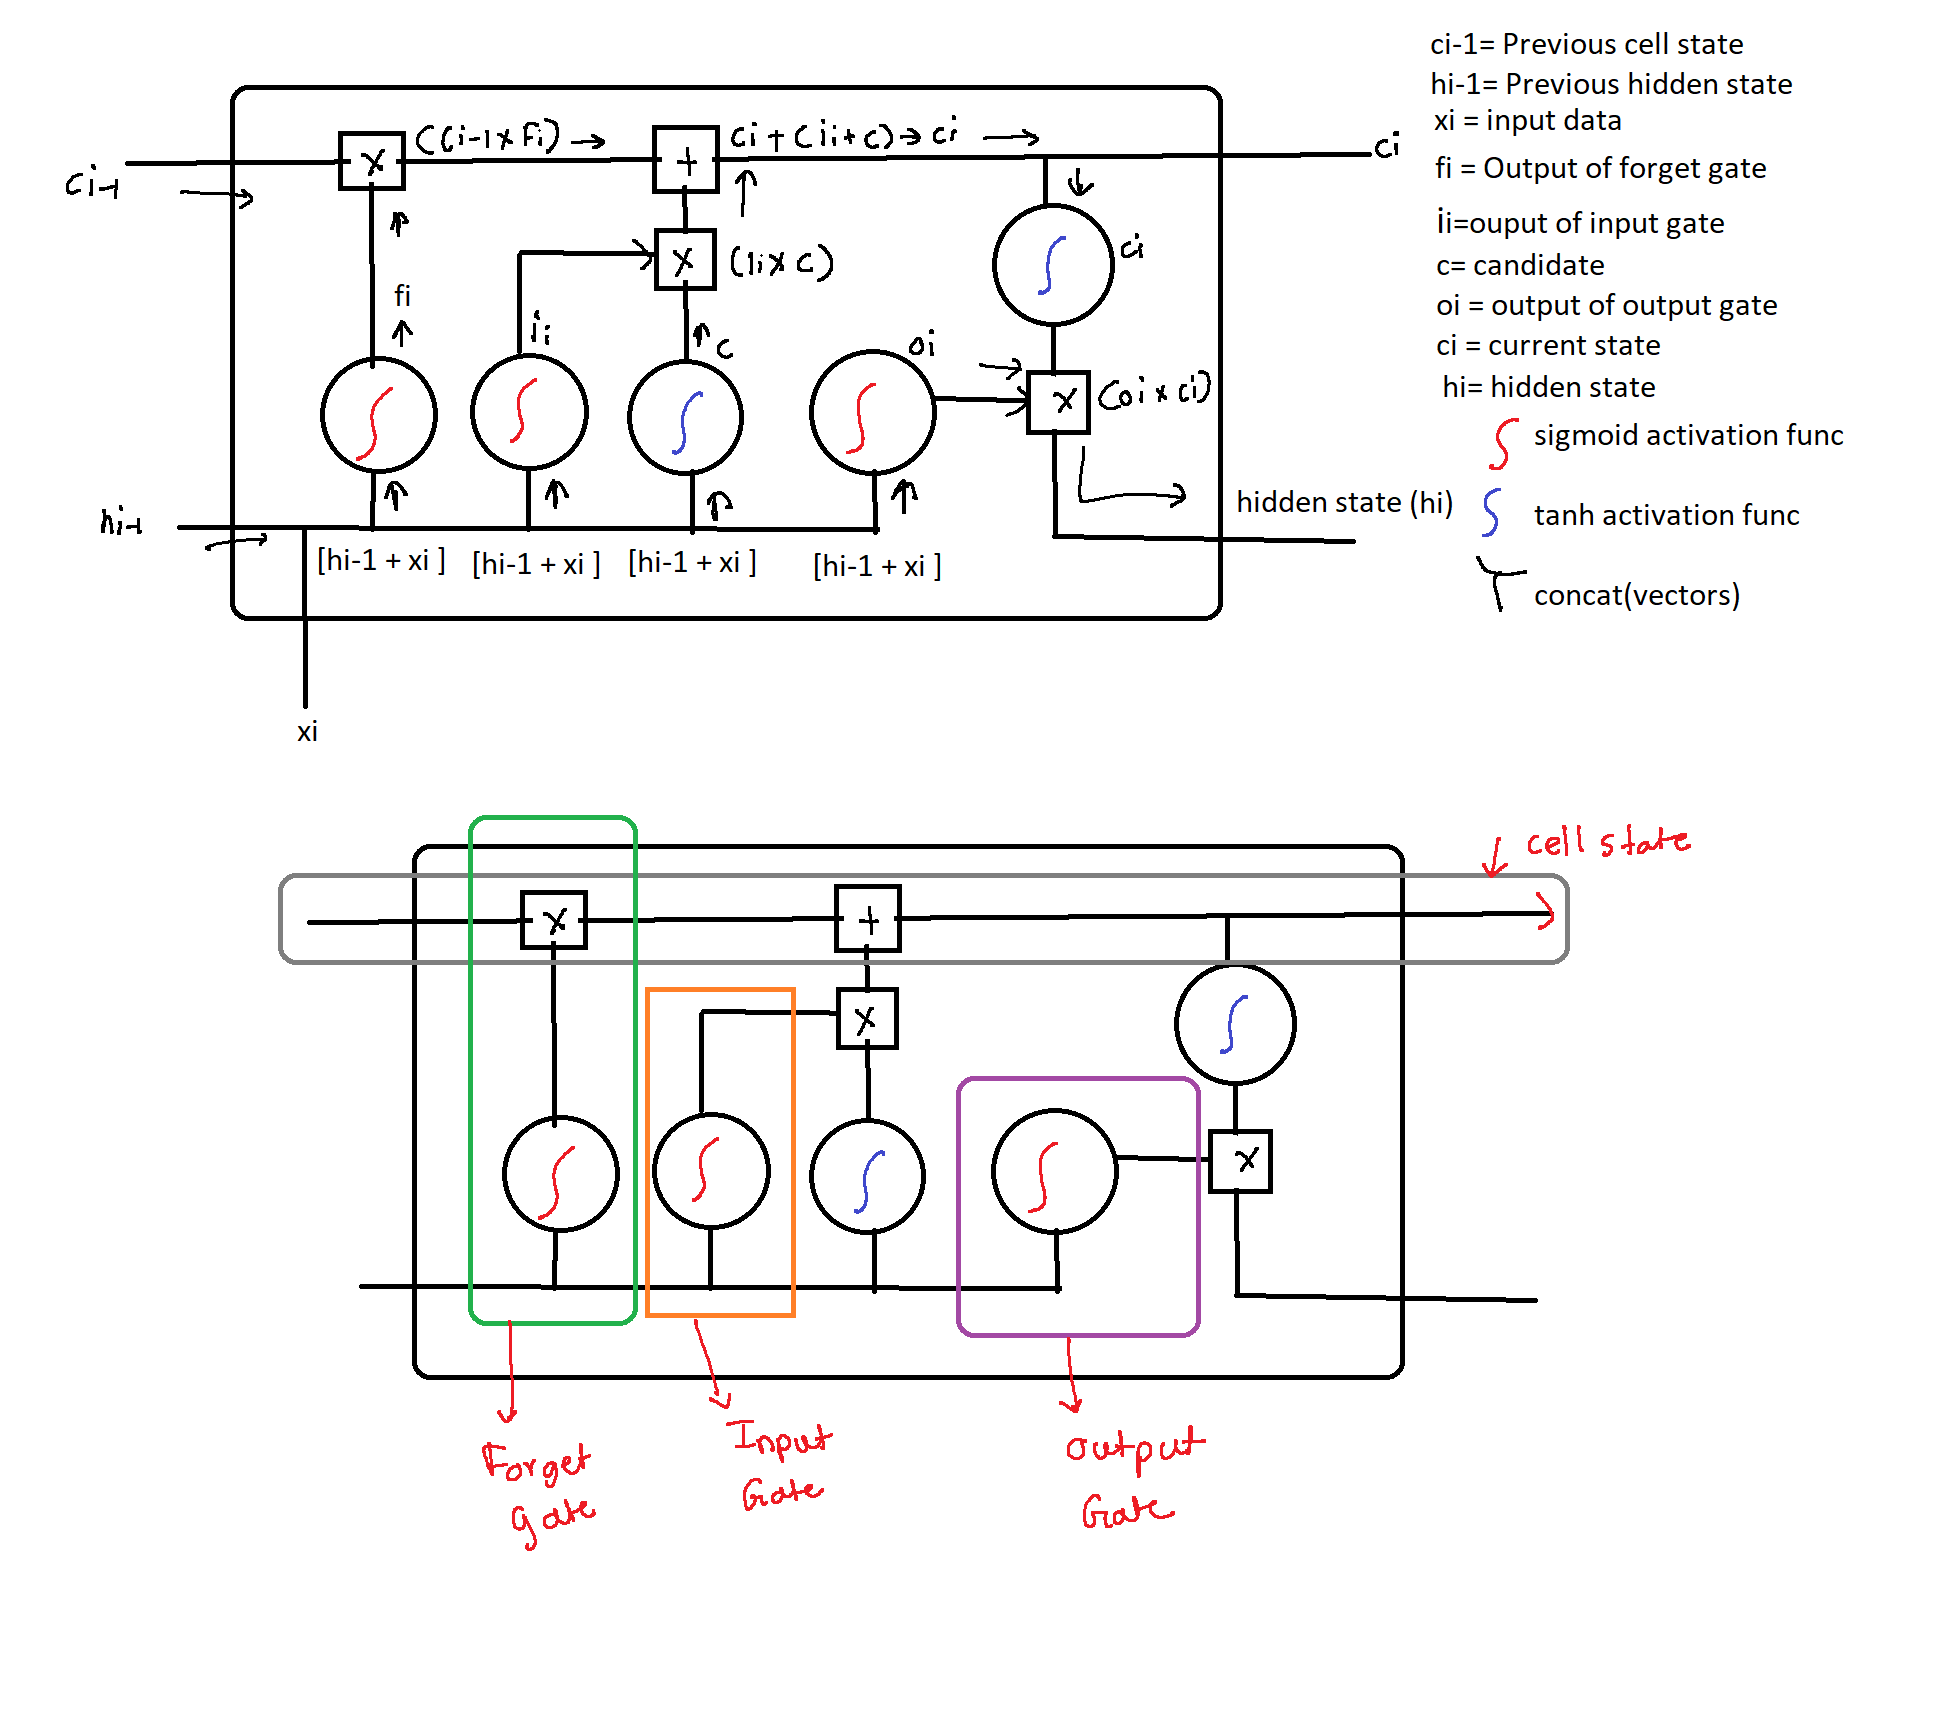

In [3]:
df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


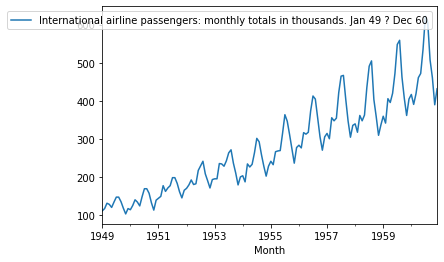

In [4]:
df.plot()

In [6]:
df.shape[0] #total size (row,col)

144

In [5]:
size=int(df.shape[0]*0.8)
size

115

In [8]:
train=df.iloc[:size]
test=df.iloc[size:]

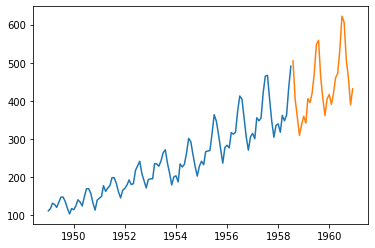

In [10]:
plt.plot(train)
plt.plot(test)

In [11]:
from sklearn.preprocessing import  MinMaxScaler
ms=MinMaxScaler()
ms.fit(train)
sc_train=ms.transform(train)
sc_test=ms.transform(test)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model=Sequential()
lstm_model.add(LSTM(200,activation='relu',input_shape=(12,1))) # input shape(time lag ,columns)
lstm_model.add(Dense(1))
lstm_model.compile(loss='mse',optimizer='adam')

In [16]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [17]:
from keras.preprocessing.sequence import TimeseriesGenerator
gen=TimeseriesGenerator(sc_train,sc_train,length=12,batch_size=1)

In [56]:
lstm_model.fit_generator(gen,epochs=25,steps_per_epoch=10)

Epoch 1/25
10/10 [==============================] - 0s 11ms/step - loss: 0.0061


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 2/25
10/10 [==============================] - 0s 11ms/step - loss: 0.0014
Epoch 3/25
10/10 [==============================] - 0s 11ms/step - loss: 7.7636e-04
Epoch 4/25
10/10 [==============================] - 0s 12ms/step - loss: 0.0016
Epoch 5/25
10/10 [==============================] - 0s 11ms/step - loss: 3.5660e-04
Epoch 6/25
10/10 [==============================] - 0s 11ms/step - loss: 8.1555e-04
Epoch 7/25
10/10 [==============================] - 0s 11ms/step - loss: 0.0018
Epoch 8/25
10/10 [==============================] - 0s 11ms/step - loss: 3.7178e-04
Epoch 9/25
10/10 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 10/25
10/10 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 11/25
10/10 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 12/25
10/10 [==============================] - 0s 12ms/step - loss: 0.0018
Epoch 13/25
10/10 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 14/25
10/10 [=

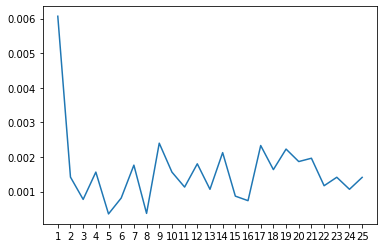

In [57]:
loss=lstm_model.history.history['loss']
plt.plot(range(1,len(loss)+1),loss)
a=plt.xticks(range(1,len(loss)+1))

In [22]:
# For Testing generating time series data
gen_test=TimeseriesGenerator(sc_test,sc_test,length=12,batch_size=1)
#length is time lag
#batch size is no of sample with each iteration

In [35]:
xtest=[]
ytest=[]
for i in range(len(gen_test)):
  x,y=gen_test[i]
  xtest.append(x[0])
  ytest.append(y[0][0])

In [38]:
ytest

[1.1757105943152455,
 0.9276485788113695,
 0.7829457364341086,
 0.6666666666666667,
 0.7777777777777779,
 0.8087855297157625,
 0.7416020671834627,
 0.8139534883720931,
 0.9224806201550388,
 0.9509043927648579,
 1.1136950904392766,
 1.3385012919896642,
 1.2971576227390182,
 1.0439276485788114,
 0.9224806201550388,
 0.7390180878552972,
 0.8475452196382429]

In [58]:
pred=lstm_model.predict(gen_test)

In [59]:
actual=ms.inverse_transform(np.array(ytest).reshape(-1, 1))
pred=ms.inverse_transform(pred)

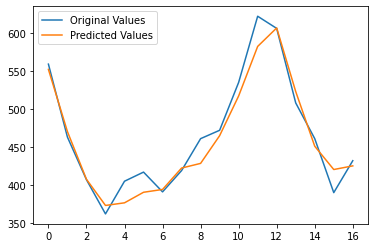

In [60]:
plt.plot(actual,label="Original Values")
plt.plot(pred,label="Predicted Values")
plt.legend()

In [61]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(actual,pred)
print("MSE is ",mse)
rmse=np.sqrt(mse)
print("RMSE is ",rmse)

MSE is  356.0875679211255
RMSE is  18.870282666699126
